# `trim_floating_solid`
``trim_floating_solid``function is a filter which removes solids not attached to primary solid structure.

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import scipy
import matplotlib.pyplot as plt
import skimage

## `im`
How floating solids are removed and the result can depend on whether the image is 2D or 3D so here we investigate both cases.  The 2D and 3D images are visualized but only a slice of the 3D image is shown.

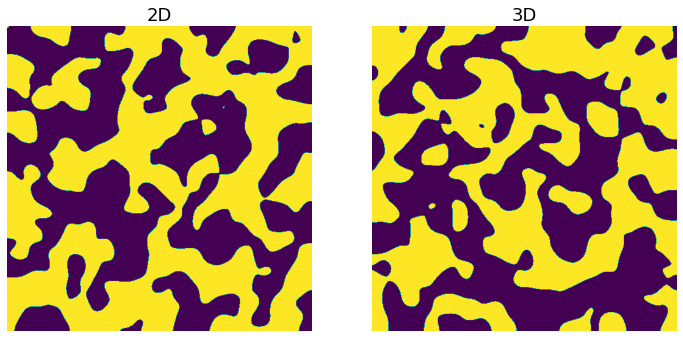

In [2]:
im2d = ps.generators.blobs(shape=[500, 500])
im3d = ps.generators.blobs(shape=[500, 500, 500])

fig, ax = plt.subplots(1, 2, figsize=[12, 12]);
ax[0].imshow(im2d);
ax[0].axis(False);
ax[0].set_title('2D', fontdict={'fontsize': 18});
ax[1].imshow(im3d.take(indices=250, axis=2));
ax[1].axis(False);
ax[1].set_title('3D', fontdict={'fontsize': 18});

## 2D `conn`
`conn` options for 2D images are 4 and 8 for square and diagonal neighbours respectively.

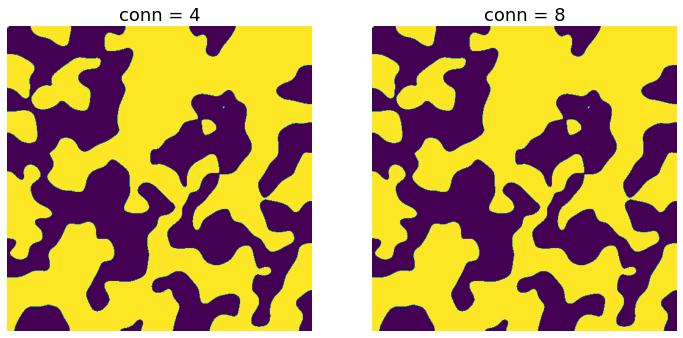

In [3]:
x1 = ps.filters.trim_floating_solid(im=im2d, conn=4)
x2 = ps.filters.trim_floating_solid(im=im2d, conn=8)

fig, ax = plt.subplots(1, 2, figsize=[12, 12]);
ax[0].imshow(x1);
ax[0].axis(False);
ax[0].set_title('conn = 4', fontdict={'fontsize': 18});
ax[1].imshow(x2);
ax[1].axis(False);
ax[1].set_title('conn = 8', fontdict={'fontsize': 18});

`conn` options for 3D images are 6 and 26 for similarly square and diagonal neighbours. Apparent floating solids in the visualized 2D slice may actually be attached to solid in adjacent 2D slice and therefore may not actually be considered to be a floating solid.

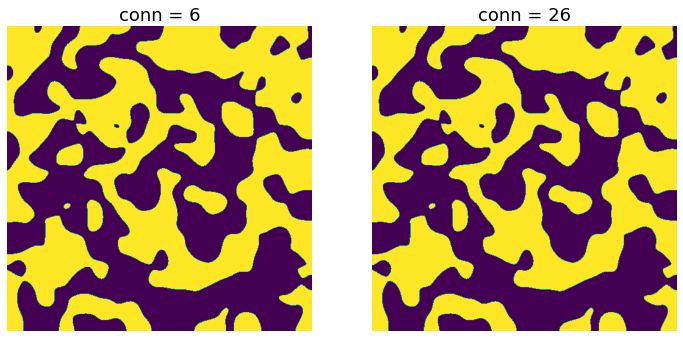

In [4]:
x3 = ps.filters.trim_floating_solid(im=im3d, conn=6)
x4 = ps.filters.trim_floating_solid(im=im3d, conn=26)

fig, ax = plt.subplots(1, 2, figsize=[12, 12]);
ax[0].imshow(x3.take(indices=250, axis=2));
ax[0].axis(False);
ax[0].set_title('conn = 6', fontdict={'fontsize': 18});
ax[1].imshow(x4.take(indices=250, axis=2));
ax[1].axis(False);
ax[1].set_title('conn = 26', fontdict={'fontsize': 18});